<a href="https://colab.research.google.com/github/zzhining/ml_basic/blob/main/pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

**[참고자료]** 
- [sklearn pca](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

# [실습 01] Iris Dataset

## 실습 목표
---
- 차원 축소의 필요성 및 효과에 대해 이해합니다.
- PCA를 수행하여 차원 축소하는 방법에 대해 실습합니다.

## 실습 목차
---

1. **데이터 읽기:** iris 데이터를 불러오고 Dataframe 구조를 확인

2. **데이터 전처리:** 머신러닝 모델에 필요한 입력값 형식으로 데이터 처리

3. **머신러닝 모델 학습:** 분류 모델을 사용하여 학습 수행, 평가 및 예측 수행

3. **PCA 적용 후 머신러닝 모델 학습:** PCA로 차원 축소한 변수의 성능 비교

## 실습 개요
---
머신러닝 프로세스 과정을 이해하고, 데이터 전처리, 학습, 평가 단계를 구현합니다.

## 1. 데이터 읽기
---



### 1.1 라이브러리 불러오기
---
머신러닝에 필요한 주요 라이브러리를 불러옵니다.

 - **numpy**: 수치형 데이터를 배열 구조로 처리하기 위한 라이브러리
 - **pandas**: 데이터프레임을 다루기 위한 라이브러리
 - **matplotlib.pyplot**: 데이터시각화를 위한 라이브러리
 - **seaborn**: 데이터시각화를 위한 라이브러리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

seed = 42

### 1.2 데이터 불러오기
---
pandas를 사용하여 dataframe 형태로 데이터를 불러옵니다. 데이터프레임을 담을 변수는 `df`로 설정합니다.

In [2]:
# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()
df = pd.DataFrame(iris.data , columns=iris.feature_names)
df['species']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0



### 1.3 데이터 탐색
---

`df`의 컬럼별 요약정보(info)를 확인합니다. 각 컬럼별 데이터 타입과 결측치 여부를 확인합니다.

In [3]:
# 컬럼별 요약정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


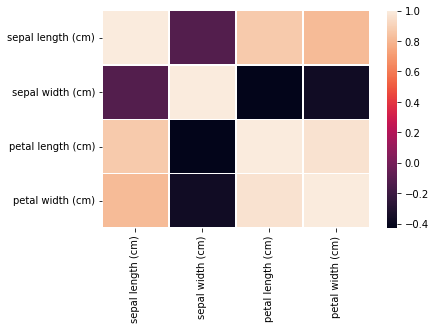

In [4]:
X = df.iloc[:, :4]
sns.heatmap(X.corr(), linewidths=.5)

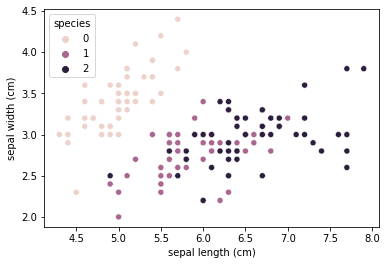

In [5]:
sns.scatterplot(x= df[df.columns[0]], y= df[df.columns[1]], hue=df['species'], legend ='auto')

## 2. 데이터 전처리(원본)
----
머신러닝을 하기 위한 데이터 전처리를 수행합니다. 독립변수(X)와 종속변수(Y)로 각 컬럼을 나누고, 학습용 데이터와 테스트용 데이터로 분할하는 데이터 분할을 수행합니다. 독립변수(X)에 대해서 정규화를 수행합니다.

### 2.1 종속변수, 독립변수 할당
-----

In [6]:
# 전체 컬럼에서 0~4번 컬럼에 해당하는 값을 독립변수(X)로 할당
X = df.iloc[:, :4]

# species 컬럼을 종속변수(y)로 할당
y = df['species']

# X에 할당된 값 확인
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


X에 `species`를 제외한 모든 컬럼이 할당되었습니다.

### 2.2 학습용, 테스트용 데이터 분할
-----
train_test_split()을 사용하여 전처리가 완료된 데이터를 분할합니다.

In [7]:
# sklearn에서 제공하는 train_test_split 임포트
from sklearn.model_selection import train_test_split

# 데이터 분할
# - 테스트용 데이터의 비율을 20%로 설정
# - 동일한 샘플링 결과를 얻기 위해 random_state 설정
# - y의 비율을 기준으로 샘플링
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = seed, stratify = y)

# 분할된 변수의 결과 출력
print('X: {}, X_train: {}, X_test:{}'.format(X.shape, X_train.shape, X_test.shape))
print('y: {}, y_train: {}, y_test:{}'.format(y.shape, y_train.shape, y_test.shape))

X: (150, 4), X_train: (120, 4), X_test:(30, 4)
y: (150,), y_train: (120,), y_test:(30,)


150개의 데이터가 학습용 데이터 120개, 테스트용 데이터 30개로 분할되었습니다.

In [8]:
# y값을 기준으로 계층적(stratified) 샘플링이 적용되어 데이터가 분할되었는지 여부를 확인
print(y.value_counts()/len(y) * 100)
print(y_train.value_counts()/len(y_train) * 100)
print(y_test.value_counts()/len(y_test) * 100)

0    33.333333
1    33.333333
2    33.333333
Name: species, dtype: float64
0    33.333333
2    33.333333
1    33.333333
Name: species, dtype: float64
0    33.333333
2    33.333333
1    33.333333
Name: species, dtype: float64


0과 1의 비율이 학습용 데이터셋과 테스트용 데이터 셋 모두 약 59:41로 기존 데이터의 비율과 동일하게 분할되었습니다.

## 3. 머신러닝 모델 수행(원본)
-----

RandomForestClassifier 알고리즘을 사용하여 분류(classifier) 모델을 생성하는 머신러닝 학습을 수행합니다.


### 3.1 학습

RandomForestClassifier 클래스의 기본 매개변수를 사용하여 모델을 학습시킵니다.

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 3.2 평가
-----

In [10]:
# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(rf.score(X_train, y_train)))

# 테스트용 데이터 셋의 정확도rf
print("test 세트 정확도: {:.3f}".format(rf.score(X_test, y_test)))

train 세트 정확도: 1.000
test 세트 정확도: 0.900


기본 매개변수를 사용하여 학습시킨 모델의 테스트 정확도는 약 86.3%입니다.

### 3.3 예측
-----

In [11]:
# X_test를 입력으로하여 결과값 예측
y_pred = rf.predict(X_test)

예측값과 실제값의 분포를 확인하기 위해 혼동행렬을 사용하여 시각화 합니다.

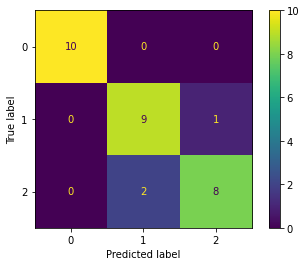

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
cm_display = ConfusionMatrixDisplay(cm).plot()

실제값이 1인데 예측을 2로 하는 경우가 1건, 실제값이 2인데 예측을 1으로 하는 경우가 2건이 존재합니다.

## 4. 데이터 전처리 - 차원축소(PCA)
----
PCA를 사용하여 차원축소를 진행합니다.

### 4.1 차원축소(PCA)

In [13]:
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components= 4)
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648 0.01710261 0.00521218]


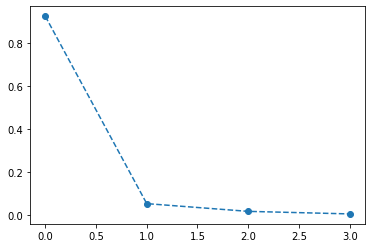

In [14]:
# scree plot
plt.plot(pca.explained_variance_ratio_, 'o--')

In [15]:
# PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(X)
print(pca_transformed.shape)

(150, 2)


In [16]:
df['pca_1'] = pca_transformed[:,0]
df['pca_2'] = pca_transformed[:,1]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,-2.728717,0.326755


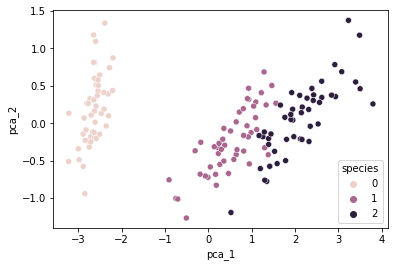

In [17]:
sns.scatterplot(x= df['pca_1'], y= df['pca_2'], hue=df['species'], legend ='auto')

In [18]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


### 4.2 종속변수, 독립변수 할당
----------


In [19]:
# 전체 컬럼에서 0~4번 컬럼에 해당하는 값을 독립변수(X)로 할당
X = df.iloc[:, 5:]

# species 컬럼을 종속변수(y)로 할당
y = df['species']

X.head()

,pca_1,pca_2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


### 4.3 학습용, 테스트용 데이터 분할
----------

In [20]:
# 데이터 분할
# - 테스트용 데이터의 비율을 20%로 설정
# - 동일한 샘플링 결과를 얻기 위해 random_state 설정
# - y의 비율을 기준으로 샘플링
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = seed, stratify = y)

# 분할된 변수의 결과 출력
print('X: {}, X_train: {}, X_test:{}'.format(X.shape, X_train.shape, X_test.shape))
print('y: {}, y_train: {}, y_test:{}'.format(y.shape, y_train.shape, y_test.shape))

X: (150, 2), X_train: (120, 2), X_test:(30, 2)
y: (150,), y_train: (120,), y_test:(30,)


## 5. 머신러닝 모델 수행(PCA)
-----

### 5.1 학습
---

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_pca = RandomForestClassifier(random_state=seed)
rf_pca.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 5.2 평가
---

In [22]:
# 학습용 데이터 셋의 정확도
print("train 세트 정확도: {:.3f}".format(rf_pca.score(X_train, y_train)))

# 테스트용 데이터 셋의 정확도
print("test 세트 정확도: {:.3f}".format(rf_pca.score(X_test, y_test)))

train 세트 정확도: 1.000
test 세트 정확도: 0.900


### 5.3 예측
-----

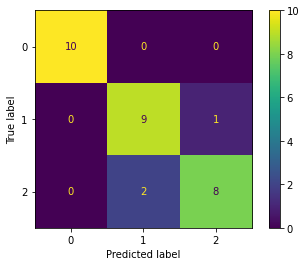

In [23]:
y_pred = rf_pca.predict(X_test)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# 혼동행렬 생성
cm = confusion_matrix(y_test, y_pred)

# 혼동행렬 시각화
cm_display = ConfusionMatrixDisplay(cm).plot()

# [실습 02] 

- 데이터셋1 : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- 데이터셋2 : 유방암 데이터 셋
- EDA
    * 모델 생성을 위해 고려해야할 요소 및 전처리 활동은 무엇이 있을까?
- PCA를 사용하여 차원 축소 
    * 몇 개의 차원으로 축소하는 것이 좋을까?


In [24]:
credit_df = pd.read_csv('creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['label'] = breast_cancer.target
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
